<a href="https://colab.research.google.com/github/jaewon-huh/DA_DS_dreamtree/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 혼공머신러닝3

## 04 다양한 분류 알고리즘 

## 로지스틱 회귀 

* 럭키박스의 확률 

### k- 최근접 이웃d을 통해 계산 : 주변 샘플의 클래스를 확률로 삼아 샘플의 클래스 확률 계산

In [ ]:
# 데이터 준비 
import pandas as pd 
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
# 물고기 종류의 고유값 
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
# secies열을 타겟으로 설정 나머지 컬럼은 입력 데이터로 사용 
fish_input = fish[['Weight'	,'Length'	,'Diagonal',	'Height','Width']].to_numpy() # 넘파이 배열로 

In [ ]:
fish_input[:5] # 5행

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
# 타겟
fish_target = fish['Species'].to_numpy()

* 훈련 데이터와 테스트 데이터 나누기 

In [ ]:
from sklearn.model_selection import train_test_split
train_input , test_input, train_target, test_target = train_test_split(fish_input, fish_target,
                                                                       random_state =42 )

In [ ]:
# 특성 정규화 하기 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input) 
train_scaled = ss.transform(train_input) 
test_scaled = ss.transform(test_input)

* K-최근접 이웃 분류기 확률 예측 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors= 3) # 이웃 개수 3 
# 훈련 
kn.fit(train_scaled, train_target)
# 점수 
print('학습 셋 점수:',  kn.score(train_scaled ,train_target)) 
print('테스트 셋 점수:',  kn.score(test_scaled ,test_target)) 

학습 셋 점수: 0.8907563025210085
테스트 셋 점수: 0.85


* 다중분류 : 타겟 데이터에 다양한 클래스   
사이킷런 모델 타깃 알파벳 순으로 자동 정렬 

In [ ]:
print(kn.classes_) # 정렬된 타깃 값 

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 테스트 세트에 처음 5개 샘플 타깃값 예측 
kn.predict(test_scaled[:5]) 

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

* predict_proba() : 클래스별 확률값  반환 ,
* round( decimals = 소수점 아래 자리수 지정 )

In [ ]:
import numpy as np 
proba = kn.predict_proba(test_scaled[:5])
print(kn.classes_)
print(np.round(proba, decimals =4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
# 네번째 샘플의 최근접 이웃 클래스 확인 -> Perch 2/3 , Roach 1/3
distances, indexes = kn.kneighbors(test_scaled[3:4]) 
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


### 로지스틱 회귀 : 로지스틱 함수 이용해 확률 표현

z = a * 무게 + b * 길이 + c * 대각길이 + d * 높이...  
z는 어떤 값도 가능- > 확률 되려면 z 범위가 0 ~1   
z가 아주 큰 음수 -> 0 / 큰 양수 -> 1  z = 0 -> 0.5가 되도록

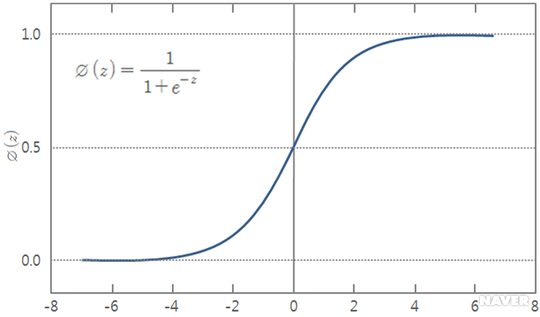

* 넘파이를 이용해 시그모이드 함수 그래프 표현 

Text(0, 0.5, 'phi')

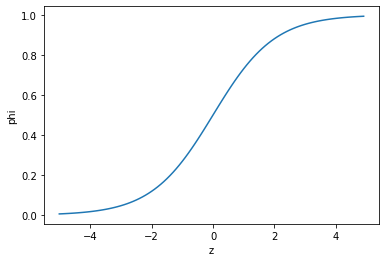

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5, 0.1) # -5 ~ +5, 0.1간격
phi = 1/ (1+ np.exp(-z)) # 시그모이드 함수 
plt.plot( z, phi) 
plt.xlabel('z') 
plt.ylabel('phi')

#### 이진분류 수행
도미와 빙어 구분 : 1. 도미 or 빙어 -> T / 나머지 - F

In [ ]:
# 도미or 빙어인 데이터만 가져옴
bream_smelt_indexes = (train_target == 'Bream') | (train_target =='Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

* 로지스틱 회귀모델 훈련   
sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
# train_bream_smelt의 첫 5개 샘플 예측 
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
# 클래스별 확률 값 
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

도미 : 0 (음성 ) / 빙어 : 1 (양성) -> 알파벳순 B  S 

In [ ]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [ ]:
# 로지스틱 회귀 학습 계수 확인 
lr.coef_ , lr.intercept_

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))

로지스틱 회귀 모델이 학습한 방정식   
z = -0.4 *'Weight' -0.57 *'Length' -0.66 *'Diagonal' -1.01 *	'Height' * -0.73 'Width' - 2.16

* z 값을 계산  : decision_function() 메서드 

In [ ]:
# 처음 5개 샘플의 z 값 
decisions = lr.decision_function(train_bream_smelt[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

: 위 z값들을 로지스틱 함수에 통과시키면 확률 얻음.   
scipy의 expit() 함수 사용

In [ ]:
# z 값을 로지스틱 함수 확률로 변환
from scipy.special import expit
print(expit(decisions)) # : 양성 클래스 1(빙어)일 확률

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


#### 로지스틱 회귀로 다중 분류 수행 : 7개의 생선 분류     

##### LogisticRegression(C = 규제 정도 (alpha와 같은 기능, but C 작을수록 규제 큼) , max_iter = 반복 알고리즘 횟수 기본값 100)   

* 계수의 제곱을 규제 : L2규제( 릿지 회귀, 로지스틱 회귀)

In [ ]:
lr = LogisticRegression(C = 20 , max_iter =1000)
lr.fit(train_scaled, train_target) # 7개 생선 훈련 셋
print('훈련 점수:', lr.score(train_scaled, train_target))
print('테스트 점수:', lr.score(test_scaled, test_target))

훈련 점수: 0.9327731092436975
테스트 점수: 0.925


In [ ]:
# 테스트 세트 5개 샘플에 대한 예측 값 과 각각 예측 확률 
print(lr.predict(test_scaled[:5]),'\n') 
print(lr.classes_) # 생선 종류들 
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba , decimals = 3)) # 소수 3째자리까지 표현 

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch'] 

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


: 1 - perch ,0.841 / 2- smelt , 0.946 / 3 - pike , 0.935 / 4- Roach , 0.567 / 5- Perch , 0.904

In [ ]:
# 다중분류 선형 방정식 모습
lr.coef_.shape , lr.intercept_.shape

((7, 5), (7,))

: coef_ 열 5개 = 5개의 특성을 사용 / 행 & intecept_ 7개 : z를 7개 계산 (클래스 개수만큼 방정식 훈련)   
다중분류는 클래스마다 z 값을 하나씩 계산 , 가장 높은 z 값 출력 클래스가 예측  클래스   
소프트맥스 softmax 함수 이용해 7개 z값을 확률로 변환 sum(z1~z7) -> 0 ~ 1 

In [ ]:
# 다중 분류의 z 값들을 구하고 softmax함수 이용해 확률로 변환 
# z1 ~ z7 값 구하기 decision_function
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals =2)) 

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
# scipy softmax 함수 이용해 확률로 변환 
from scipy.special import softmax
proba = softmax(decision , axis = 1) # 각 행(샘플)에 대해 소프트 맥스 게산 
print(np.round(proba, decimals =3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 확률적 경사 하강법 

: 새로운 훈련데이터가 추가 됨에 따라 점진적 학습이 필요해짐  

* 확률적 경사 하강법을 사용한 분류모델 

In [ ]:
# fish 데이터 준비 
import pandas as pd 
fish = pd.read_csv('https://bit.ly/fish_csv')

In [ ]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [ ]:
# 입력데이터와 타겟 데이터 분할 
fish_input = fish[[ 'Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# 학습 및 테스트 데이터 분할 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target , random_state= 42)

In [ ]:
# 특성 스케일 전처리 
from sklearn.preprocessing import StandardScaler 
ss= StandardScaler()
# fit
ss.fit(train_input)
# transform - 훈련 / 테스트 
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

* 사이킷런 확률적 경사 하강법 : SGDClassifier 클래스   
from sklearn.linear_model import SGDClassifier  
SGDClassifier(loss = '손실함수 종류 지정' (log) , max_iter= 수행할 에포크 횟수) ) 

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss ='log', max_iter =10 ,random_state= 42) # 손실함수 로그함수 , 에포크횟수 10회(전체 훈련셋 10회)
# 학습
sc.fit(train_scaled, train_target)
# 점수 
print('학습 셋 점수:', sc.score(train_scaled, train_target))
print('테스트 셋 점수:', sc.score(test_scaled, test_target))

학습 셋 점수: 0.773109243697479
테스트 셋 점수: 0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


: 점수가 모두 낮음 (과소적합), max_iter 횟수가 부족 ConvergenceWarning

* 점진적 학습 : 추가로 훈련,  
 partial_fit()- 호출 시마다 1에포크씩 이어서 훈련 


In [ ]:
sc.partial_fit(train_scaled, train_target)
print('학습 셋 점수:', sc.score(train_scaled, train_target))
print('테스트 셋 점수:', sc.score(test_scaled, test_target))

학습 셋 점수: 0.8151260504201681
테스트 셋 점수: 0.85


* 얼마나 에포크를 수행( 적정 에포크 -> 과소 / 과대적합 해결)  
partial_fit() 으로만 수행 - 훈련세트에 있는 전체 클래스 레이블을 partial_fit() 메서드에 전달 

In [ ]:
import numpy as np 
sc= SGDClassifier(loss ='log', random_state =42)
classes = np.unique(train_target) # 생선 목록 
# 훈련 /테스트 세트 점수 기록 
train_score = []
test_score = []

In [ ]:
# 300번 에포크 수행 
for _ in range(0,300):  # _ 전달할 인자가 필료 없음 그냥 300번 수행 
  sc.partial_fit(train_scaled, train_target, classes = classes )
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

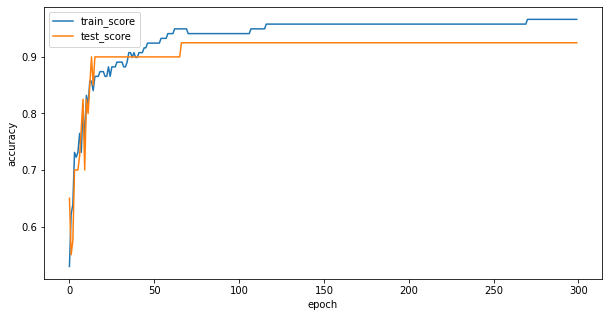

In [ ]:
# 300 번 에포크 동안 기록한 훈련  /테스트 점수  -> 그래프 
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.plot(train_score) # 훈련 세트 점수 변화 
plt.plot(test_score)  # 테스트 세트 점수 변화

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(labels =['train_score', 'test_score'], loc ='best')

: 에포크 초기 - 과소적합 , 에포크 100 이상 - 과대적합도 증가 

In [ ]:
# 에포크 100으로 지정하고 모델 훈련 
sc = SGDClassifier(loss ='log', max_iter= 100, tol = None, random_state= 42) 
# tol =  향상될 최소값 , None : 멈추지 않고 max_iter 100만큼 반복 
sc.fit(train_scaled, train_target)
print('학습 셋 점수:', sc.score(train_scaled, train_target))
print('테스트 셋 점수:', sc.score(test_scaled, test_target))


학습 셋 점수: 0.957983193277311
테스트 셋 점수: 0.925


* SGDClassifier( loss = 디폴트 값 'hinge')   
힌지 손실: 서포트 벡터 머신, 손실함수 

In [ ]:
# 힌지 손실 함수 적용 
sc = SGDClassifier(loss = 'hinge', max_iter =100 , tol  =None , random_state =42 )
sc.fit(train_scaled , train_target)
print('학습 셋 점수:', sc.score(train_scaled, train_target))
print('테스트 셋 점수:', sc.score(test_scaled, test_target))

학습 셋 점수: 0.9495798319327731
테스트 셋 점수: 0.925
